In [ ]:
# ===============================================================
# 01_data_import.py
# Téléchargement et sauvegarde des données du S&P 500 (Yahoo Finance)
# ===============================================================

import importlib.util
import sys
from pathlib import Path
import numpy as np
import pandas as pd

# --- Vérification des dépendances ---
_required = ["yfinance", "pandas", "numpy", "matplotlib", "arch", "tensorflow"]
_missing = [pkg for pkg in _required if importlib.util.find_spec(pkg) is None]
if _missing:
    print(f"Installing missing packages: {', '.join(_missing)} ...")
    import subprocess
    subprocess.check_call([sys.executable, "-m", "pip", "install", * _missing])

import yfinance as yf

# --- Configuration du téléchargement ---
ticker = "^GSPC"   # Indice S&P 500
start = "2010-01-01"
end = "2025-01-01"
interval = "1d"

# --- Préparer le dossier de sortie ---
outdir = Path("data")
outdir.mkdir(parents=True, exist_ok=True)
outfile = outdir / "sp500_data.csv"

# --- Téléchargement des données ---
try:
    data = yf.download(ticker, start=start, end=end, interval=interval,
                       progress=False, auto_adjust=True)
except Exception as e:
    sys.exit(f"Erreur lors du téléchargement : {e}")

# --- Vérification du contenu ---
if data.empty:
    sys.exit("Aucune donnée téléchargée. Vérifiez le ticker ou la connexion Internet.")

# --- Calcul des rendements logarithmiques ---
price_col = "Adj Close" if "Adj Close" in data.columns else "Close"
data["log_return"] = np.log(data[price_col] / data[price_col].shift(1))
data.dropna(inplace=True)

# --- Sauvegarde ---
data.to_csv(outfile)
print(data.head())
print(f"✅ {len(data)} observations sauvegardées dans : {outfile}")



Installing missing packages: yfinance, arch, tensorflow ...
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.2/949.2 kB 46.0 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached wheel-0.45.1-py3-none-any.whl.metadata (2.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.3/981.3 kB 45.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


   ━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━  7/34 [werkzeug]

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


   ━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━ 18/34 [h5py]own]m]-data-server]

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━ 24/34 [tensorboard]

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━ 29/34 [statsmodels]

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━ 33/34 [tensorflow]]

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34/34 [tensorflow]4 [tensorflow]



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python -m pip install --upgrade pip


Price             Close         High          Low         Open      Volume  \
Ticker            ^GSPC        ^GSPC        ^GSPC        ^GSPC       ^GSPC   
Date                                                                         
2010-01-05  1136.520020  1136.630005  1129.660034  1132.660034  2491020000   
2010-01-06  1137.140015  1139.189941  1133.949951  1135.709961  4972660000   
2010-01-07  1141.689941  1142.459961  1131.319946  1136.270020  5270680000   
2010-01-08  1144.979980  1145.390015  1136.219971  1140.520020  4389590000   
2010-01-11  1146.979980  1149.739990  1142.020020  1145.959961  4255780000   

Price      log_return  
Ticker                 
Date                   
2010-01-05   0.003111  
2010-01-06   0.000545  
2010-01-07   0.003993  
2010-01-08   0.002878  
2010-01-11   0.001745  
✅ 3773 observations sauvegardées dans : data/sp500_data.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Style graphique
plt.style.use("seaborn-v0_8")

# Charger le fichier CSV sauvegardé à l'étape 1
data = pd.read_csv("data/sp500_data.csv", index_col=0, parse_dates=True)

# Vérifier le contenu
print(data.head())


                         Close                High                 Low  \
Price                                                                    
Ticker                   ^GSPC               ^GSPC               ^GSPC   
Date                       NaN                 NaN                 NaN   
2010-01-05    1136.52001953125  1136.6300048828125  1129.6600341796875   
2010-01-06  1137.1400146484375    1139.18994140625   1133.949951171875   
2010-01-07    1141.68994140625     1142.4599609375  1131.3199462890625   

                          Open      Volume  log_return  
Price                                                   
Ticker                   ^GSPC       ^GSPC         NaN  
Date                       NaN         NaN         NaN  
2010-01-05  1132.6600341796875  2491020000    0.003111  
2010-01-06     1135.7099609375  4972660000    0.000545  
2010-01-07    1136.27001953125  5270680000    0.003993  


/tmp/ipykernel_13607/3849724517.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv("data/sp500_data.csv", index_col=0, parse_dates=True)


In [3]:
# Vérifier si la colonne 'log_return' existe
if "log_return" not in data.columns:
    price_col = "Adj Close" if "Adj Close" in data.columns else "Close"
    data["log_return"] = np.log(data[price_col] / data[price_col].shift(1))
    data.dropna(inplace=True)

print(data[["log_return"]].head())


            log_return
Price                 
Ticker             NaN
Date               NaN
2010-01-05    0.003111
2010-01-06    0.000545
2010-01-07    0.003993


In [7]:
# CELLULE 2 — Calcul des rendements (log) si nécessaire
import numpy as np

# Choisir la colonne prix
price_col = "Adj Close" if "Adj Close" in data.columns else "Close"

# S'assurer que la colonne prix est numérique
data[price_col] = pd.to_numeric(data[price_col], errors="coerce")

# Calculer log return si absent ou pour recalcul propre
data["log_return"] = np.log(data[price_col] / data[price_col].shift(1))
data = data.dropna(subset=[price_col, "log_return"]).copy()

print("Nombre d'observations après nettoyage :", len(data))
display(data[[price_col, "log_return"]].head())


Nombre d'observations après nettoyage : 3772


,Close,log_return
Price,,
2010-01-06,1137.140015,0.000545
2010-01-07,1141.689941,0.003993
2010-01-08,1144.979980,0.002878
2010-01-11,1146.979980,0.001745
2010-01-12,1136.219971,-0.009425


[*********************100%***********************]  1 of 1 completed

Price             Close         High          Low         Open      Volume
Ticker            ^GSPC        ^GSPC        ^GSPC        ^GSPC       ^GSPC
Date                                                                      
2010-01-04  1132.989990  1133.869995  1116.560059  1116.560059  3991400000
2010-01-05  1136.520020  1136.630005  1129.660034  1132.660034  2491020000
2010-01-06  1137.140015  1139.189941  1133.949951  1135.709961  4972660000
2010-01-07  1141.689941  1142.459961  1131.319946  1136.270020  5270680000
2010-01-08  1144.979980  1145.390015  1136.219971  1140.520020  4389590000


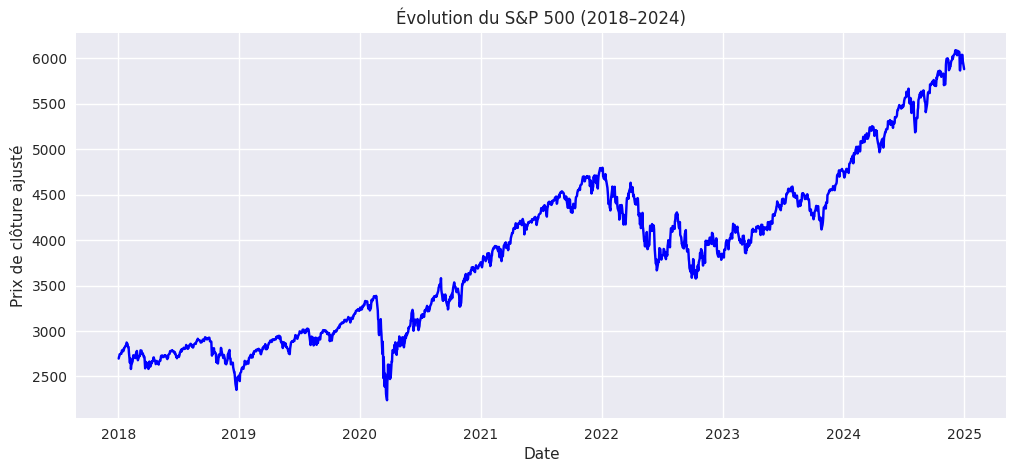

In [14]:
# Installer yfinance si ce n'est pas déjà fait
# !pip install yfinance --quiet

import yfinance as yf
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8")

# 🔹 Télécharger les données du S&P 500
# auto_adjust=True pour obtenir le prix ajusté directement
sp500 = yf.download("^GSPC", start="2010-01-01", end="2025-01-01", auto_adjust=True)

# 🔹 Vérifier les premières lignes pour voir les colonnes
print(sp500.head())

# 🔹 Filtrer la période 2018-01-01 à 2024-12-31
data_filtered = sp500.loc["2018-01-01":"2024-12-31"]

# 🔹 Tracer le prix de clôture ajusté
plt.figure(figsize=(12, 5))
plt.plot(data_filtered.index, data_filtered["Close"], color="blue")
plt.title("Évolution du S&P 500 (2018–2024)")
plt.xlabel("Date")
plt.ylabel("Prix de clôture ajusté")
plt.grid(True)
plt.show()


In [15]:
import numpy as np

# Calcul des rendements log quotidiens (%)
data_filtered['log_return'] = 100 * np.log(data_filtered['Close'] / data_filtered['Close'].shift(1))

# Supprimer la première valeur NaN
log_returns = data_filtered['log_return'].dropna()

# Vérifier
print(log_returns.head())


Date
2018-01-03    0.637843
2018-01-04    0.402054
2018-01-05    0.700915
2018-01-08    0.166096
2018-01-09    0.130208
Name: log_return, dtype: float64


/tmp/ipykernel_13607/2740751993.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['log_return'] = 100 * np.log(data_filtered['Close'] / data_filtered['Close'].shift(1))


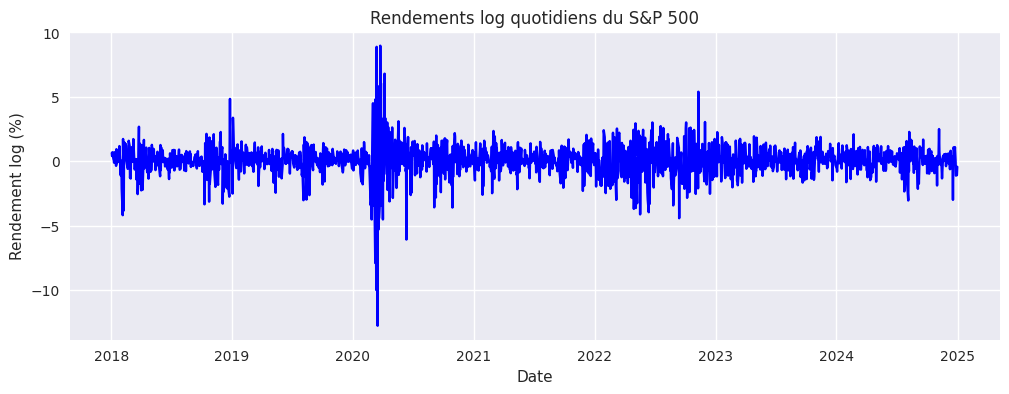

In [17]:
plt.figure(figsize=(12,4))
plt.plot(log_returns, color='blue')
plt.title("Rendements log quotidiens du S&P 500")
plt.xlabel("Date")
plt.ylabel("Rendement log (%)")
plt.grid(True)
plt.show()


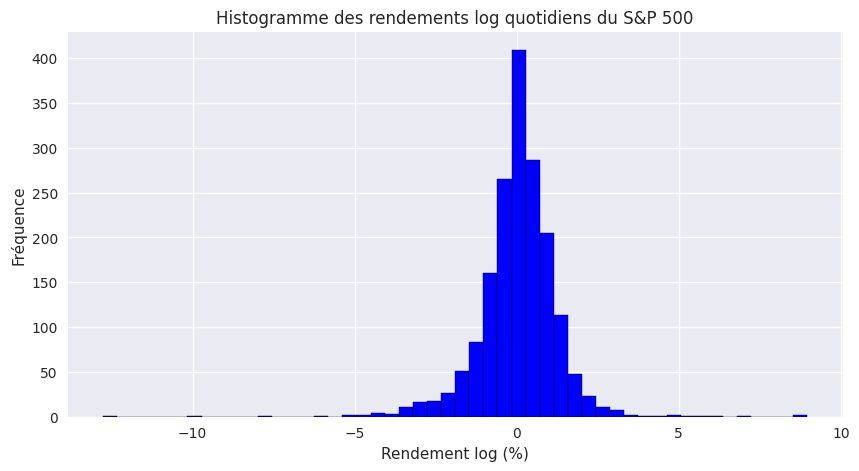

Skewness (asymétrie) : -0.8156
Kurtosis (applatissement, queues épaisses) : 14.4213


In [19]:
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew

# 🔹 Tracer l'histogramme des rendements log
plt.figure(figsize=(10,5))
plt.hist(log_returns, bins=50, color='blue', edgecolor='black')
plt.title("Histogramme des rendements log quotidiens du S&P 500")
plt.xlabel("Rendement log (%)")
plt.ylabel("Fréquence")
plt.grid(True)
plt.show()

# 🔹 Calculer la kurtosis et la skewness
kurt = kurtosis(log_returns)  # excès de kurtosis (kurtosis > 0 => queues épaisses)
skw = skew(log_returns)

print(f"Skewness (asymétrie) : {skw:.4f}")
print(f"Kurtosis (applatissement, queues épaisses) : {kurt:.4f}")


/tmp/ipykernel_13607/809782255.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['volatility_garch'] = res.conditional_volatility


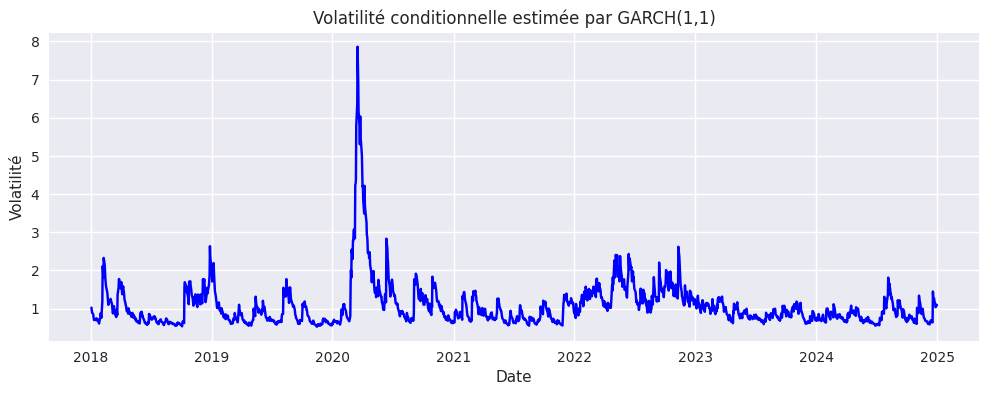

In [21]:
from arch import arch_model

# Ajuster un GARCH(1,1) sur les rendements log
am = arch_model(log_returns, vol='Garch', p=1, q=1)
res = am.fit(disp="off")

# Volatilité estimée
data_filtered['volatility_garch'] = res.conditional_volatility

# Tracer
plt.figure(figsize=(12,4))
plt.plot(data_filtered.index[1:], data_filtered['volatility_garch'][1:], color='blue')
plt.title("Volatilité conditionnelle estimée par GARCH(1,1)")
plt.xlabel("Date")
plt.ylabel("Volatilité")
plt.grid(True)
plt.show()


In [22]:
from arch import arch_model

# Modèle GARCH(1,1) avec distribution Student-t
am = arch_model(log_returns, vol='Garch', p=1, q=1, dist='studentst')
res = am.fit(disp='off')
print(res.summary())

# Volatilité estimée
data_filtered['volatility_garch'] = res.conditional_volatility


                        Constant Mean - GARCH Model Results                         
Dep. Variable:                   log_return   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -2402.40
Distribution:      Standardized Student's t   AIC:                           4814.80
Method:                  Maximum Likelihood   BIC:                           4842.16
                                              No. Observations:                 1760
Date:                      Mon, Oct 27 2025   Df Residuals:                     1759
Time:                              22:32:00   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu        

/tmp/ipykernel_13607/2106548673.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['volatility_garch'] = res.conditional_volatility


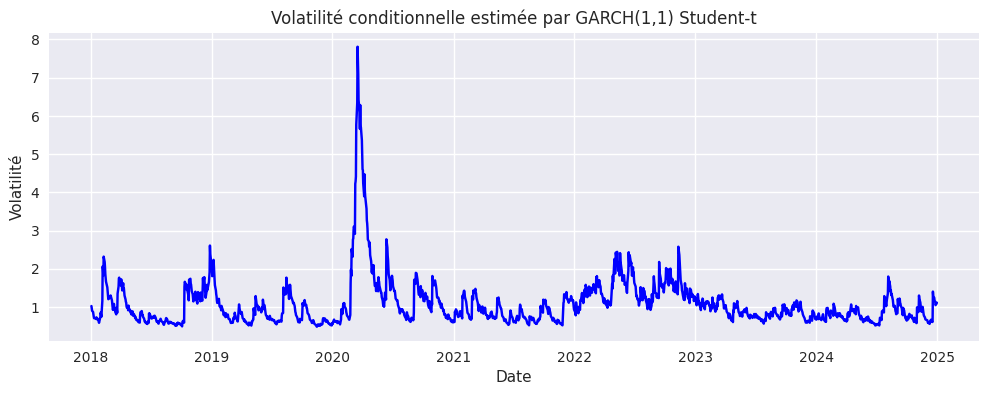

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.plot(data_filtered.index[1:], data_filtered['volatility_garch'][1:], color='blue')
plt.title("Volatilité conditionnelle estimée par GARCH(1,1) Student-t")
plt.xlabel("Date")
plt.ylabel("Volatilité")
plt.grid(True)
plt.show()


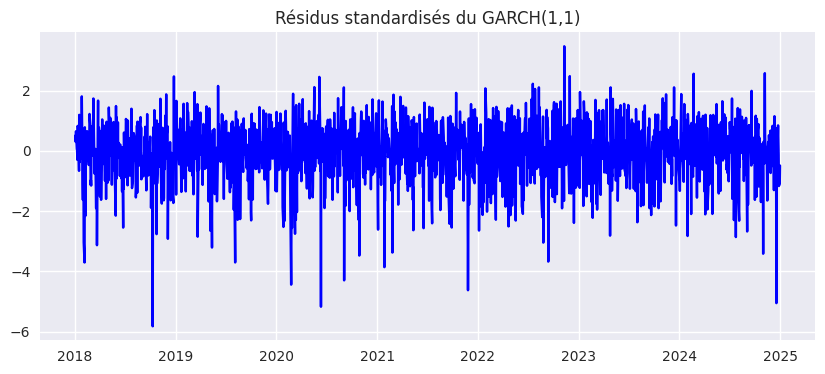

In [26]:
residuals = res.std_resid  # résidus standardisés
plt.figure(figsize=(10,4))
plt.plot(residuals, color='blue')
plt.title("Résidus standardisés du GARCH(1,1)")
plt.grid(True)
plt.show()


In [27]:
from statsmodels.stats.diagnostic import het_arch

arch_test = het_arch(residuals)
print("Test ARCH:", arch_test)


Test ARCH: (np.float64(6.323892995517694), np.float64(0.7873567928649291), 0.6306933882404249, 0.7885813618342967)


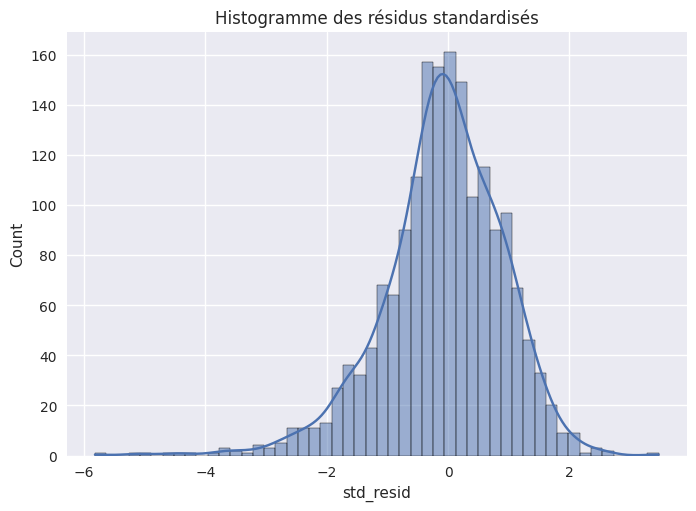

In [28]:
import seaborn as sns
sns.histplot(residuals, bins=50, kde=True)
plt.title("Histogramme des résidus standardisés")
plt.show()


GARCH(2,2) Summary:
                        Constant Mean - GARCH Model Results                         
Dep. Variable:                   log_return   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -2401.60
Distribution:      Standardized Student's t   AIC:                           4817.19
Method:                  Maximum Likelihood   BIC:                           4855.50
                                              No. Observations:                 1760
Date:                      Mon, Oct 27 2025   Df Residuals:                     1759
Time:                              22:34:30   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
-----------------------------------------------------------------

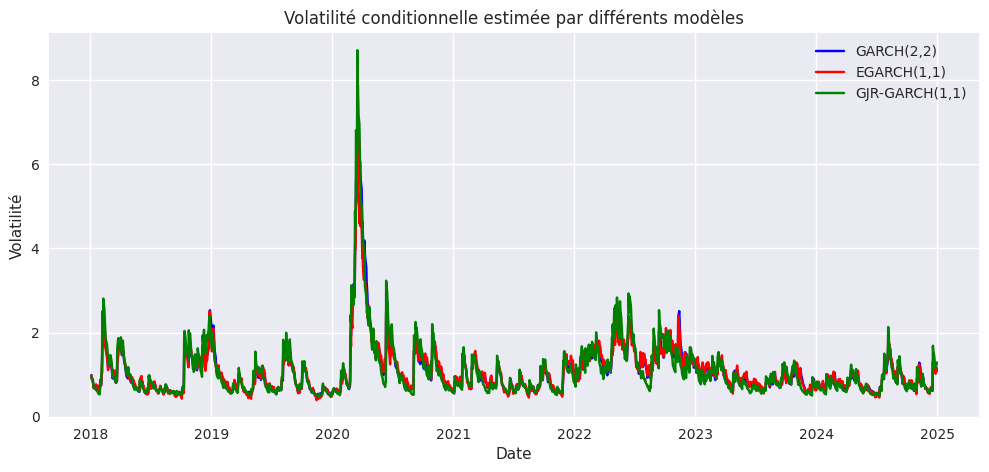

In [29]:
from arch import arch_model
import matplotlib.pyplot as plt

# 🔹 GARCH(p,q) avec p=2, q=2
garch_2_2 = arch_model(log_returns, vol='Garch', p=2, q=2, dist='studentst')
res_garch_2_2 = garch_2_2.fit(disp='off')
print("GARCH(2,2) Summary:")
print(res_garch_2_2.summary())

# Volatilité estimée
vol_garch_2_2 = res_garch_2_2.conditional_volatility

# 🔹 EGARCH(1,1)
egarch = arch_model(log_returns, vol='EGARCH', p=1, q=1, dist='studentst')
res_egarch = egarch.fit(disp='off')
print("\nEGARCH(1,1) Summary:")
print(res_egarch.summary())

vol_egarch = res_egarch.conditional_volatility

# 🔹 GJR-GARCH (ou TGARCH) 1,1
gjr = arch_model(log_returns, vol='GARCH', p=1, q=1, o=1, dist='studentst')  # o=1 pour le terme asymétrique
res_gjr = gjr.fit(disp='off')
print("\nGJR-GARCH(1,1) Summary:")
print(res_gjr.summary())

vol_gjr = res_gjr.conditional_volatility

# 🔹 Tracer les volatilités estimées
plt.figure(figsize=(12,5))
plt.plot(log_returns.index[1:], vol_garch_2_2[1:], label='GARCH(2,2)', color='blue')
plt.plot(log_returns.index[1:], vol_egarch[1:], label='EGARCH(1,1)', color='red')
plt.plot(log_returns.index[1:], vol_gjr[1:], label='GJR-GARCH(1,1)', color='green')
plt.title("Volatilité conditionnelle estimée par différents modèles")
plt.xlabel("Date")
plt.ylabel("Volatilité")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
returns = data_filtered["log_return"].dropna()

In [ ]:
def var_es_normal(returns, alpha=0.05):
    mu = returns.mean()
    sigma = returns.std()
    
    # Z-score pour le niveau de confiance
    z_alpha = stats.norm.ppf(alpha)
    
    # VaR paramétrique
    VaR = mu + z_alpha * sigma
    
    # ES paramétrique (Expected Shortfall)
    ES = mu - sigma * (stats.norm.pdf(z_alpha) / alpha)
    
    return VaR, ES


In [ ]:
def var_es_historical(returns, alpha=0.05):
    
    sorted_returns = np.sort(returns)
    n = len(sorted_returns)
    index = int(np.floor(n * alpha))
    VaR = sorted_returns[index]
    ES = sorted_returns[:index].mean()
    
    return VaR, ES

In [ ]:
def var_es_monte_carlo(returns, alpha=0.05, n_simulations=10000):
    """
    Calcul de la VaR et ES par simulation Monte Carlo
    
    Parameters:
    returns: série de rendements
    alpha: niveau de confiance
    n_simulations: nombre de simulations
    
    Returns:
    VaR, ES
    """
    mu = returns.mean()
    sigma = returns.std()
    
    # Générer des rendements simulés
    simulated_returns = np.random.normal(mu, sigma, n_simulations)
    
    # Trier les rendements simulés
    sorted_simulated = np.sort(simulated_returns)
    
    # Index pour le quantile alpha
    index = int(np.floor(n_simulations * alpha))
    
    # VaR Monte Carlo
    VaR = sorted_simulated[index]
    
    # ES Monte Carlo
    ES = sorted_simulated[:index].mean()
    
    return VaR, ES

In [ ]:
def var_es_cornish_fisher(returns, alpha=0.05):
    """
    Calcul de la VaR et ES avec ajustement Cornish-Fisher
    (prend en compte la skewness et la kurtosis)
    
    Parameters:
    returns: série de rendements
    alpha: niveau de confiance
    
    Returns:
    VaR, ES (approximé)
    """
    mu = returns.mean()
    sigma = returns.std()
    skew = stats.skew(returns)
    kurt = stats.kurtosis(returns)  # Fisher kurtosis
    
    # Z-score normal
    z_alpha = stats.norm.ppf(alpha)
    
    # Ajustement Cornish-Fisher
    z_cf = (z_alpha + 
            (1/6) * (z_alpha**2 - 1) * skew +
            (1/24) * (z_alpha**3 - 3*z_alpha) * kurt -
            (1/36) * (2*z_alpha**3 - 5*z_alpha) * skew**2)
    VaR = mu + z_cf * sigma
    n_simulations = 10000
    simulated = np.random.normal(0, 1, n_simulations)
    simulated_adjusted = mu + sigma * (simulated + 
                                      (1/6) * (simulated**2 - 1) * skew +
                                      (1/24) * (simulated**3 - 3*simulated) * kurt -
                                      (1/36) * (2*simulated**3 - 5*simulated) * skew**2)
    
    sorted_simulated = np.sort(simulated_adjusted)
    index = int(np.floor(n_simulations * alpha))
    ES = sorted_simulated[:index].mean()
    
    return VaR, ES

In [ ]:
def var_es_garch(returns, alpha=0.05, forecast_days=1):
    try:
        from arch import arch_model
        returns_series = returns.values / 100  
        model = arch_model(returns_series, vol='Garch', p=1, q=1, dist='normal')
        garch_result = model.fit(disp='off')
        
        # Prévoir la variance pour le prochain jour
        forecast = garch_result.forecast(horizon=forecast_days)
        forecast_variance = forecast.variance.values[-1, -1]
        forecast_std = np.sqrt(forecast_variance) * 100  # Reconvertir en pourcentage
        
        # Utiliser la moyenne historique pour le rendement attendu
        mu = returns.mean()
        
        # Calculer VaR et ES avec volatilité GARCH
        z_alpha = stats.norm.ppf(alpha)
        VaR = mu + z_alpha * forecast_std
        ES = mu - forecast_std * (stats.norm.pdf(z_alpha) / alpha)
        
        return VaR, ES, forecast_std, garch_result
        
    except Exception as e:
        print(f"Erreur dans le calcul GARCH: {e}")
        print("Utilisation d'une approximation simple...")
        mu = returns.mean()
        sigma = returns.std()
        z_alpha = stats.norm.ppf(alpha)
        VaR = mu + z_alpha * sigma
        ES = mu - sigma * (stats.norm.pdf(z_alpha) / alpha)
        return VaR, ES, sigma, None

In [ ]:
from scipy import stats
print("\n" + "="*60)
print("CALCUL DE LA VAR ET EXPECTED SHORTFALL")
print("="*60)

# Niveaux de confiance à analyser
confidence_levels = [0.95, 0.99, 0.995]

# Stocker les résultats
results = {
    'Modèle': [],
    'Niveau Confiance': [],
    'VaR (%)': [],
    'ES (%)': [],
    'Différence ES-VaR (%)': []
}

for alpha in confidence_levels:
    conf_text = f"{(1-alpha)*100:.1f}%"
    
    # 1. Modèle Normal
    VaR_norm, ES_norm = var_es_normal(returns, alpha)
    results['Modèle'].append('Normal')
    results['Niveau Confiance'].append(conf_text)
    results['VaR (%)'].append(VaR_norm)
    results['ES (%)'].append(ES_norm)
    results['Différence ES-VaR (%)'].append(ES_norm - VaR_norm)
    
    # 2. Modèle Historique
    VaR_hist, ES_hist = var_es_historical(returns, alpha)
    results['Modèle'].append('Historique')
    results['Niveau Confiance'].append(conf_text)
    results['VaR (%)'].append(VaR_hist)
    results['ES (%)'].append(ES_hist)
    results['Différence ES-VaR (%)'].append(ES_hist - VaR_hist)
    
    # 3. Monte Carlo
    VaR_mc, ES_mc = var_es_monte_carlo(returns, alpha, n_simulations=10000)
    results['Modèle'].append('Monte Carlo')
    results['Niveau Confiance'].append(conf_text)
    results['VaR (%)'].append(VaR_mc)
    results['ES (%)'].append(ES_mc)
    results['Différence ES-VaR (%)'].append(ES_mc - VaR_mc)
    
    # 4. Cornish-Fisher
    VaR_cf, ES_cf = var_es_cornish_fisher(returns, alpha)
    results['Modèle'].append('Cornish-Fisher')
    results['Niveau Confiance'].append(conf_text)
    results['VaR (%)'].append(VaR_cf)
    results['ES (%)'].append(ES_cf)
    results['Différence ES-VaR (%)'].append(ES_cf - VaR_cf)
    
    # 5. GARCH
    VaR_garch, ES_garch, vol_garch, garch_model = var_es_garch(returns, alpha)
    results['Modèle'].append('GARCH(1,1)')
    results['Niveau Confiance'].append(conf_text)
    results['VaR (%)'].append(VaR_garch)
    results['ES (%)'].append(ES_garch)
    results['Différence ES-VaR (%)'].append(ES_garch - VaR_garch)

# Créer un DataFrame avec les résultats
results_df = pd.DataFrame(results)
print("\nRésultats VaR et Expected Shortfall:")
print("-" * 80)
print(results_df.to_string(index=False))

In [ ]:

VaR_hist_95, ES_hist_95 = var_es_historical(returns, alpha=0.05)

print(f"VaR Historique 95%: {VaR_hist_95:.4f}%")
print(f"ES Historique 95%: {ES_hist_95:.4f}%")

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('VaR et Expected Shortfall - S&P 500 (2018-2024)', fontsize=16)

# 1. Comparaison VaR par modèle
ax1 = axes[0, 0]
for model in results_df['Modèle'].unique():
    model_data = results_df[results_df['Modèle'] == model]
    ax1.plot(model_data['Niveau Confiance'], model_data['VaR (%)'], 
             marker='o', label=model, linewidth=2)
ax1.set_xlabel('Niveau de Confiance')
ax1.set_ylabel('VaR (%)')
ax1.set_title('VaR par Modèle')
ax1.legend(loc='upper left', fontsize=8)
ax1.grid(True, alpha=0.3)
ax2 = axes[0, 1]
for model in results_df['Modèle'].unique():
    model_data = results_df[results_df['Modèle'] == model]
    ax2.plot(model_data['Niveau Confiance'], model_data['ES (%)'], 
             marker='s', label=model, linewidth=2)
ax2.set_xlabel('Niveau de Confiance')
ax2.set_ylabel('Expected Shortfall (%)')
ax2.set_title('Expected Shortfall par Modèle')
ax2.legend(loc='upper left', fontsize=8)
ax2.grid(True, alpha=0.3)
ax3 = axes[1, 0]
for model in results_df['Modèle'].unique():
    model_data = results_df[results_df['Modèle'] == model]
    ax3.plot(model_data['Niveau Confiance'], model_data['Différence ES-VaR (%)'], 
             marker='^', label=model, linewidth=2)
ax3.set_xlabel('Niveau de Confiance')
ax3.set_ylabel('ES - VaR (%)')
ax3.set_title('Excès de Risque (ES - VaR)')
ax3.legend(loc='upper left', fontsize=8)
ax3.grid(True, alpha=0.3)

ax4 = axes[1, 1]
n_bins = 50
ax4.hist(returns, bins=n_bins, density=True, alpha=0.7, color='skyblue', edgecolor='black', label='Distribution des rendements')
ax4.axvline(x=VaR_hist_95, color='red', linestyle='--', linewidth=2, 
           label=f'VaR 95% = {VaR_hist_95:.2f}%')
ax4.axvline(x=ES_hist_95, color='darkred', linestyle='--', linewidth=2,
           label=f'ES 95% = {ES_hist_95:.2f}%')

# Colorer la zone de risque de queue
tail_returns = returns[returns <= VaR_hist_95]
if len(tail_returns) > 0:
    # Utiliser fill_between pour colorer la zone
    hist, bin_edges = np.histogram(returns, bins=n_bins, density=True)
    
    # Trouver les bins qui correspondent à la zone de queue
    mask = bin_edges[:-1] <= VaR_hist_95
    
    # Créer les données pour fill_between
    x_fill = bin_edges[:-1][mask]
    y_fill = hist[mask]
    
    # Ajouter les points pour fermer la forme
    x_fill = np.concatenate([[x_fill[0]], x_fill, [x_fill[-1]]])
    y_fill = np.concatenate([[0], y_fill, [0]])
    
    ax4.fill_between(x_fill, y_fill, alpha=0.5, color='red', label='Zone de risque extrême (5% pire)')

ax4.set_xlabel('Rendement Journalier (%)')
ax4.set_ylabel('Densité')
ax4.set_title('Distribution des Rendements avec VaR/ES Historique (95%)')
ax4.legend(loc='upper right')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()




In [ ]:
def generate_normal_var_series(returns, window=252, alpha=0.05):
    """VaR paramétrique avec fenêtre glissante"""
    var_series = pd.Series(index=returns.index, dtype=float)
    for i in range(window, len(returns)):
        window_returns = returns.iloc[i-window:i]
        mu = window_returns.mean()
        sigma = window_returns.std()
        z_alpha = stats.norm.ppf(alpha)
        var_series.iloc[i] = mu + z_alpha * sigma
    return var_series[window:]

def generate_historical_var_series(returns, window=252, alpha=0.05):
    """VaR historique avec fenêtre glissante"""
    var_series = pd.Series(index=returns.index, dtype=float)
    for i in range(window, len(returns)):
        window_returns = returns.iloc[i-window:i]
        sorted_returns = np.sort(window_returns)
        index_alpha = int(np.floor(len(sorted_returns) * alpha))
        var_series.iloc[i] = sorted_returns[index_alpha]
    return var_series[window:]

def generate_montecarlo_var_series(returns, window=252, alpha=0.05, n_simulations=1000):
    """VaR Monte Carlo avec fenêtre glissante"""
    var_series = pd.Series(index=returns.index, dtype=float)
    for i in range(window, len(returns)):
        window_returns = returns.iloc[i-window:i]
        mu = window_returns.mean()
        sigma = window_returns.std()
        simulated = np.random.normal(mu, sigma, n_simulations)
        sorted_simulated = np.sort(simulated)
        index_alpha = int(np.floor(n_simulations * alpha))
        var_series.iloc[i] = sorted_simulated[index_alpha]
    return var_series[window:]

def generate_cornishfisher_var_series(returns, window=252, alpha=0.05):
    """VaR Cornish-Fisher avec fenêtre glissante"""
    var_series = pd.Series(index=returns.index, dtype=float)
    for i in range(window, len(returns)):
        window_returns = returns.iloc[i-window:i]
        mu = window_returns.mean()
        sigma = window_returns.std()
        skew = stats.skew(window_returns)
        kurt = stats.kurtosis(window_returns)
        z_alpha = stats.norm.ppf(alpha)
        z_cf = (z_alpha + (1/6)*(z_alpha**2-1)*skew + 
                (1/24)*(z_alpha**3-3*z_alpha)*kurt - 
                (1/36)*(2*z_alpha**3-5*z_alpha)*skew**2)
        var_series.iloc[i] = mu + z_cf * sigma
    return var_series[window:]

def generate_garch_var_series(returns, window=252, alpha=0.05):
    """VaR GARCH avec fenêtre glissante"""
    var_series = pd.Series(index=returns.index, dtype=float)
    returns_scaled = returns.values / 100
    
    for i in range(window, len(returns)):
        try:
            # Données de la fenêtre
            window_returns = returns_scaled[i-window:i]
            
            # Ajuster modèle GARCH
            model = arch_model(window_returns, vol='Garch', p=1, q=1, dist='normal')
            garch_result = model.fit(disp='off', show_warning=False)
            
            # Prévoir la variance
            forecast = garch_result.forecast(horizon=1)
            forecast_std = np.sqrt(forecast.variance.values[-1, -1]) * 100
            
            # Calculer VaR
            mu = returns.iloc[i-window:i].mean()
            z_alpha = stats.norm.ppf(alpha)
            var_series.iloc[i] = mu + z_alpha * forecast_std
            
        except:
            # Fallback: VaR historique si GARCH échoue
            window_returns_data = returns.iloc[i-window:i]
            sorted_returns = np.sort(window_returns_data)
            index_alpha = int(np.floor(len(sorted_returns) * alpha))
            var_series.iloc[i] = sorted_returns[index_alpha]
    
    return var_series[window:]


In [ ]:
print("\n" + "="*80)
print("BACKTESTING COMPARATIF DES 5 MODÈLES DE VaR (95%)")
print("="*80)

def backtest_var(returns, var_series, alpha=0.05, model_name="Modèle"):
    """Fonction de backtesting complète"""
    # Aligner les indices
    common_index = returns.index.intersection(var_series.index)
    returns_aligned = returns.loc[common_index]
    var_aligned = var_series.loc[common_index]
    
    # Identifier les violations
    violations = returns_aligned < var_aligned
    n_violations = violations.sum()
    n_observations = len(returns_aligned)
    expected_violations = alpha * n_observations
    violation_rate = n_violations / n_observations if n_observations > 0 else 0
    
    # Test de Kupiec (1995) - Unconditional Coverage
    if 0 < violation_rate < 1 and n_observations > 0:
        try:
            LR_uc = -2 * np.log(
                ((1-alpha)**(n_observations-n_violations) * alpha**n_violations) /
                ((1-violation_rate)**(n_observations-n_violations) * violation_rate**n_violations)
            )
            p_value_uc = 1 - stats.chi2.cdf(LR_uc, 1)
        except:
            LR_uc = np.inf
            p_value_uc = 0
    else:
        LR_uc = np.inf
        p_value_uc = 0
    
    # Calculer la magnitude des violations
    violation_magnitudes = []
    violation_max = "N/A"
    violation_moy = "N/A"
    
    if n_violations > 0:
        violation_returns = returns_aligned[violations]
        violation_var = var_aligned[violations]
        violation_magnitudes = (violation_returns.values - violation_var.values)
        
        if len(violation_magnitudes) > 0:
            violation_max = f"{violation_magnitudes.min():.3f}%"
            violation_moy = f"{violation_magnitudes.mean():.3f}%"
    
    return {
        'Modèle': model_name,
        'Observations': n_observations,
        'Violations': int(n_violations),
        'Attendues': f"{expected_violations:.1f}",
        'Taux Violation': f"{violation_rate:.3%}",
        'Attendu': f"{alpha:.1%}",
        'LR Kupiec': f"{LR_uc:.3f}" if LR_uc != np.inf else "Inf",
        'p-value': f"{p_value_uc:.4f}",
        'Test UC': 'Accepté' if p_value_uc >= 0.05 else 'Rejeté',
        'Violation Max': violation_max,
        'Violation Moy': violation_moy
    }

# Paramètres de backtesting
window_size = 252  # 1 an de données pour l'estimation
alpha_test = 0.05  # Niveau de confiance 95%

print(f"\nParamètres du backtesting:")
print(f"  • Fenêtre d'estimation: {window_size} jours")
print(f"  • Niveau de confiance: {(1-alpha_test)*100:.1f}%")
print(f"  • Période totale: {len(returns)} jours")
print(f"  • Période de test: {len(returns)-window_size} jours")

# Générer les séries de VaR pour chaque modèle
print("\nGénération des séries de VaR...")

try:
    var_series_normal = generate_normal_var_series(returns, window_size, alpha_test)
    print(f"✓ Normal: {len(var_series_normal)} valeurs générées")
except Exception as e:
    print(f"✗ Erreur Normal: {e}")
    var_series_normal = pd.Series()

try:
    var_series_historical = generate_historical_var_series(returns, window_size, alpha_test)
    print(f"✓ Historique: {len(var_series_historical)} valeurs générées")
except Exception as e:
    print(f"✗ Erreur Historique: {e}")
    var_series_historical = pd.Series()

try:
    var_series_montecarlo = generate_montecarlo_var_series(returns, window_size, alpha_test)
    print(f"✓ Monte Carlo: {len(var_series_montecarlo)} valeurs générées")
except Exception as e:
    print(f"✗ Erreur Monte Carlo: {e}")
    var_series_montecarlo = pd.Series()

try:
    var_series_cornish = generate_cornishfisher_var_series(returns, window_size, alpha_test)
    print(f"✓ Cornish-Fisher: {len(var_series_cornish)} valeurs générées")
except Exception as e:
    print(f"✗ Erreur Cornish-Fisher: {e}")
    var_series_cornish = pd.Series()

try:
    var_series_garch = generate_garch_var_series(returns, window_size, alpha_test)
    print(f"✓ GARCH: {len(var_series_garch)} valeurs générées")
except Exception as e:
    print(f"✗ Erreur GARCH: {e}")
    var_series_garch = pd.Series()

print("✓ Séries de VaR générées pour les 5 modèles")

# Effectuer le backtesting pour chaque modèle
backtest_results = []

print("\nExécution des backtests...")

if len(var_series_normal) > 0:
    backtest_results.append(backtest_var(returns, var_series_normal, alpha_test, "Normal"))
    print("✓ Backtest Normal terminé")
else:
    print("✗ Backtest Normal échoué")

if len(var_series_historical) > 0:
    backtest_results.append(backtest_var(returns, var_series_historical, alpha_test, "Historique"))
    print("✓ Backtest Historique terminé")
else:
    print("✗ Backtest Historique échoué")

if len(var_series_montecarlo) > 0:
    backtest_results.append(backtest_var(returns, var_series_montecarlo, alpha_test, "Monte Carlo"))
    print("✓ Backtest Monte Carlo terminé")
else:
    print("✗ Backtest Monte Carlo échoué")

if len(var_series_cornish) > 0:
    backtest_results.append(backtest_var(returns, var_series_cornish, alpha_test, "Cornish-Fisher"))
    print("✓ Backtest Cornish-Fisher terminé")
else:
    print("✗ Backtest Cornish-Fisher échoué")

if len(var_series_garch) > 0:
    backtest_results.append(backtest_var(returns, var_series_garch, alpha_test, "GARCH(1,1)"))
    print("✓ Backtest GARCH terminé")
else:
    print("✗ Backtest GARCH échoué")

# Créer DataFrame des résultats
if backtest_results:
    backtest_df = pd.DataFrame(backtest_results)
    
    print("\n" + "="*80)
    print("RÉSULTATS DU BACKTESTING")
    print("="*80)
    print(backtest_df.to_string(index=False))
    
    # Ajouter des statistiques supplémentaires
    print("\n" + "="*80)
    print("ANALYSE DES RÉSULTATS")
    print("="*80)
    
    # Trouver le meilleur modèle
    if 'Test UC' in backtest_df.columns:
        accepted_models = backtest_df[backtest_df['Test UC'] == 'Accepté']
        
        if len(accepted_models) > 0:
            print(f"\n✓ Modèles avec test accepté: {len(accepted_models)}/{len(backtest_df)}")
            print("Ces modèles capturent correctement le niveau de risque:")
            for _, row in accepted_models.iterrows():
                print(f"  • {row['Modèle']}: {row['Violations']} violations ({row['Taux Violation']})")
        else:
            print("\n✗ Aucun modèle n'a passé le test de Kupiec")
            print("Tous les modèles sont soit trop conservateurs, soit trop risqués")
        
        # Modèle avec taux le plus proche du attendu
        backtest_df['Taux Num'] = backtest_df['Taux Violation'].str.rstrip('%').astype(float) / 100
        backtest_df['Diff Abs'] = abs(backtest_df['Taux Num'] - alpha_test)
        best_model_idx = backtest_df['Diff Abs'].idxmin()
        best_model = backtest_df.loc[best_model_idx, 'Modèle']
        
        print(f"\n✓ Modèle le plus proche du taux attendu: {best_model}")
        print(f"  Taux observé: {backtest_df.loc[best_model_idx, 'Taux Violation']}")
        print(f"  Taux attendu: {backtest_df.loc[best_model_idx, 'Attendu']}")
        
else:
    print("\n✗ Aucun résultat de backtesting disponible")
    print("Vérifiez que les séries de VaR ont été générées correctement")